In [4]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../data/raw/StudentsPerformance.csv')

# Quick overview
print(df.head())
print(df.info())

# Clean column names (optional cleanup)
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Check for missing values
print(df.isnull().sum())

# Simple stats
print(df.describe())

# Create average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Save cleaned data
df.to_csv('../data/cleaned/students_performance_cleaned.csv', index=False)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [5]:
import sqlite3

# Connect to SQLite DB
conn = sqlite3.connect('../sql/students.db')

# Load cleaned data into a table
df.to_sql('students_performance', conn, if_exists='replace', index=False)

# Example SQL query
query = """
SELECT gender, AVG(average_score) AS avg_score
FROM students_performance
GROUP BY gender;
"""
result = pd.read_sql(query, conn)
print(result)


   gender  avg_score
0  female  69.569498
1    male  65.837483


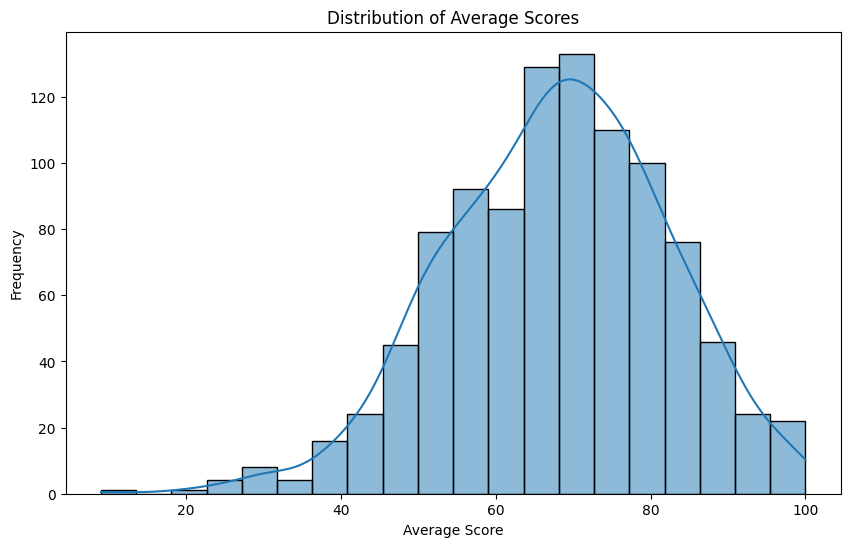

In [3]:
plt.figure(figsize=(10,6))
sns.histplot(df['average_score'], bins=20, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.savefig('../visualizations/score_distribution.png')
plt.show()
